##**Домашнее задание по теме "Алгоритмы кластеризации"**

**Цель:**
Изучить применение моделей кластеризации

**Описание задания:**

В домашнем задании нужно сократить число цветов в палитре изображения. Картинку для выполнения работы можно выбрать любую, главное условие – наличие на ней разных цветов, для того, чтобы результат работы моделей был заметен.
Для выполнения работы необходимо выделить кластеры в пространстве RGB, объекты соответствуют пикселям изображения. После выделения кластеров все пиксели, отнесенные в один кластер, заполняются одним цветом. Цвет – центроид соответствующего кластера.

**Этапы работы:**

1. Инсталлируйте библиотеку opencv, если не делали это ранее
pip install opencv-python.

2. Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).

a) Для отображения картинки воспользуйтесь вспомогательной функцией:
import matplotlib.pyplot as plt
import cv2
import skimage
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

def draw_picture(image, title, bgr=True):
    if bgr:
        b, g, r = cv2.split(image)
        image = cv2.merge([r, g, b])

    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(image)
    plt.title(title)
    plt.show()

b) Для загрузки картинки можно использовать код:
img = cv2.imread('feml.jpg')
draw_picture(img, 'Оригинальное изображение', bgr=True)

3. Реализуйте три модели кластеризации:
a) KMeans. Рассмотрите число кластеров K = 2, 5, 10, 20.
b) DBSCAN
c) AgglomerativeClustering. Рассмотрите число кластеров K = 2, 5, 10, 20.

4. Сформулируйте выводы по проделанной работе.
a) Какая модель показала лучший результат?
Для получения зачета по этому домашнему заданию минимально должно быть реализовано обучение трех моделей с одним и тем же значением кластеров, где такой параметр присутствует.
Результат:
Получены знания по применению моделей кластеризации.
Форма выполнения:
ссылка на Jupyter Notebook, загруженный на GitHub;
ссылка на Google Colab;
файл с расширением .ipynb.
Инструменты:
Jupyter Notebook/Google Colab;
GitHub;
палитра изображения.





**Решение:**

**1) Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).**

In [ ]:
import matplotlib.pyplot as plt
import cv2
import skimage

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

In [ ]:
from skimage.metrics import structural_similarity as ssim

In [ ]:
from sklearn.neighbors import NearestCentroid

In [ ]:
image = 'Изображение_к_дз_по_Кластеризации_feml.jpg'

In [ ]:
image = cv2.imread(image)

In [ ]:
def draw_picture(image, title, bgr=False):
      b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
      new_image = cv2.merge([r, g, b])
      plt.figure(figsize=(7, 5))
      plt.axis('off')
      plt.imshow(new_image)
      plt.title(title)
      plt.show()

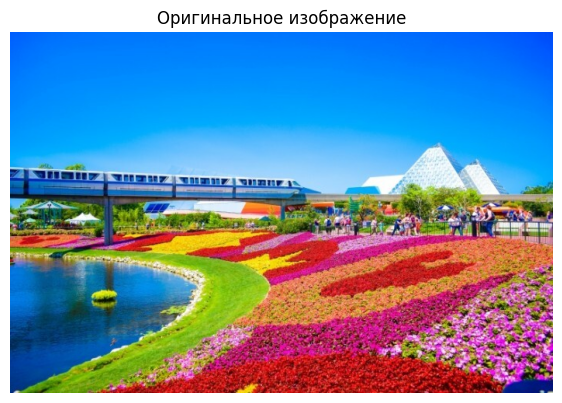

In [ ]:
draw_picture(image, 'Оригинальное изображение', bgr=False)

Преобразуем изображение в RGD:

In [ ]:
b, g, r = cv2.split(image)

In [ ]:
image = cv2.merge([r, g, b])

Преобразуем данные для обучения моделей

In [ ]:
width = image.shape[1]
height = image.shape[0]

In [ ]:
X = image.reshape([width * height,3])

**2) Реализуйте три модели кластеризации:**

a) KMeans. Рассмотрите число кластеров K = 2, 5, 10, 20.

***KMeans с количеством кластеров 2***

---



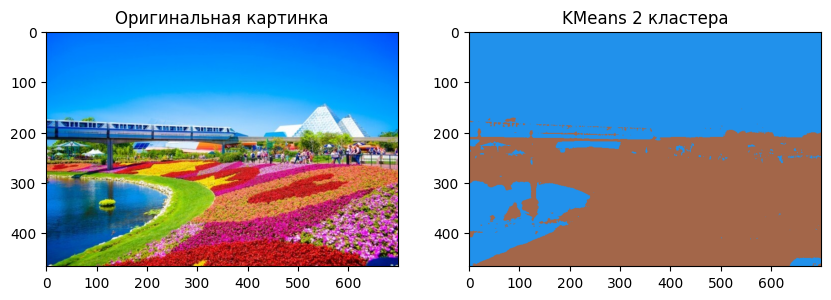

In [ ]:
kmeans_2 = KMeans(n_clusters = 2, random_state = 42)
kmeans_2.fit(X)
X_2kmeans = kmeans_2.cluster_centers_[kmeans_2.predict(X)]
X_2kmeans = X_2kmeans.astype("uint8")
img_kmeans_2 = X_2kmeans.reshape([height, width, 3])
plt.figure(figsize = [10, 10])
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 1).set_title('Оригинальная картинка')
plt.subplot(1, 2, 2)
plt.imshow(img_kmeans_2)
plt.subplot(1, 2, 2).set_title('KMeans 2 кластера')
plt.show()

Оценим работу модели при помощи метрики SSIM:

In [ ]:
score_kmeans_2, diff = ssim(image, img_kmeans_2, full=True, channel_axis=2)
score_kmeans_2

0.36490150352908984

***KMeans с количеством кластеров 5***

---

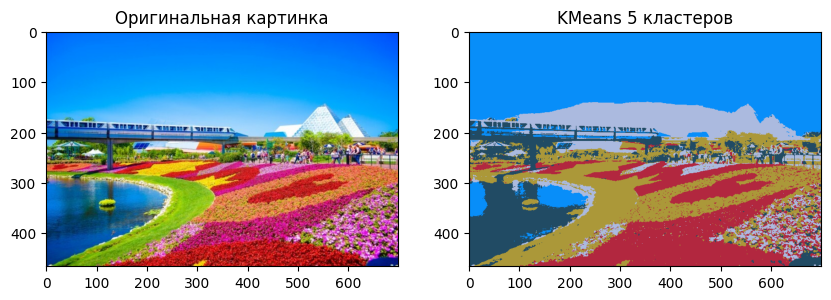

In [ ]:
kmeans_5 = KMeans(n_clusters = 5, random_state = 42)
kmeans_5.fit(X)
X_5kmeans = kmeans_5.cluster_centers_[kmeans_5.predict(X)]
X_5kmeans = X_5kmeans.astype("uint8")
img_kmeans_5 = X_5kmeans.reshape([height, width, 3])
plt.figure(figsize = [10, 10])
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 1).set_title('Оригинальная картинка')
plt.subplot(1, 2, 2)
plt.imshow(img_kmeans_5)
plt.subplot(1, 2, 2).set_title('KMeans 5 кластеров')
plt.show()

Оценим работу модели при помощи метрики SSIM:

In [ ]:
score_kmeans_5, diff = ssim(image, img_kmeans_5, full=True, channel_axis=2)
score_kmeans_5

0.5092212769619255

***KMeans с количеством кластеров 10***

---

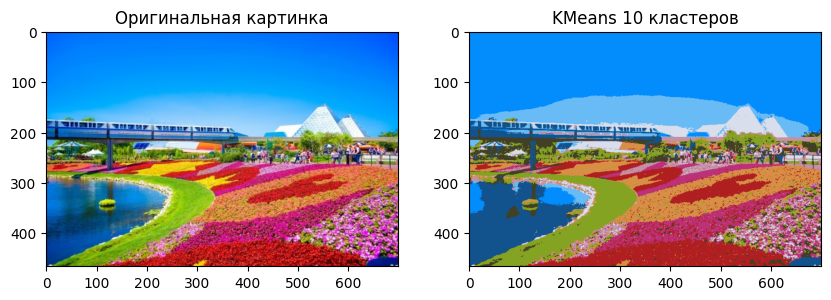

In [ ]:
kmeans_10 = KMeans(n_clusters = 10, random_state = 42)
kmeans_10.fit(X)
X_10kmeans = kmeans_10.cluster_centers_[kmeans_10.predict(X)]
X_10kmeans = X_10kmeans.astype("uint8")
img_kmeans_10 = X_10kmeans.reshape([height, width, 3])
plt.figure(figsize = [10, 10])
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 1).set_title('Оригинальная картинка')
plt.subplot(1, 2, 2)
plt.imshow(img_kmeans_10)
plt.subplot(1, 2, 2).set_title('KMeans 10 кластеров')
plt.show()

Оценим работу модели при помощи метрики SSIM:

In [ ]:
score_kmeans_10, diff = ssim(image, img_kmeans_10, full=True, channel_axis=2)
score_kmeans_10

0.6842586846376193

***KMeans с количеством кластеров 20***

---



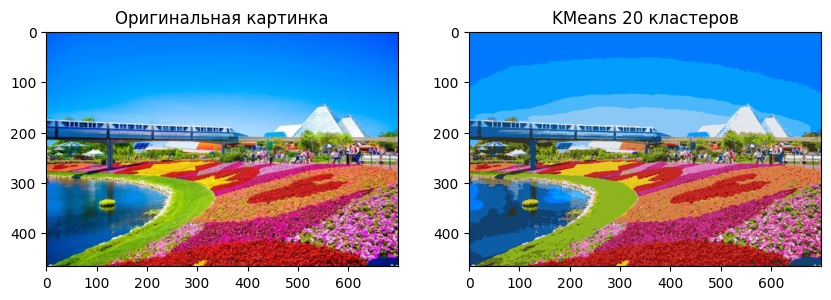

In [ ]:
kmeans_20 = KMeans(n_clusters = 20, random_state = 42)
kmeans_20.fit(X)
X_20kmeans = kmeans_20.cluster_centers_[kmeans_20.predict(X)]
X_20kmeans = X_20kmeans.astype("uint8")
img_kmeans_20 = X_20kmeans.reshape([height, width, 3])
plt.figure(figsize = [10, 10])
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 1).set_title('Оригинальная картинка')
plt.subplot(1, 2, 2)
plt.imshow(img_kmeans_20)
plt.subplot(1, 2, 2).set_title('KMeans 20 кластеров')
plt.show()

Оценим работу модели при помощи метрики SSIM:

In [ ]:
score_kmeans_20, diff = ssim(image, img_kmeans_20, full=True, channel_axis=2)
score_kmeans_20

0.771126283190903

Поскольку при попытке запустить следующие модели появлялась ошибка: Сеанс прекращен, так как объем ОЗУ полностью исчерпан.
Уменьшим изображение и создадим новые тренировочные данные.

In [ ]:
image_min = cv2.pyrDown(cv2.pyrDown(image))

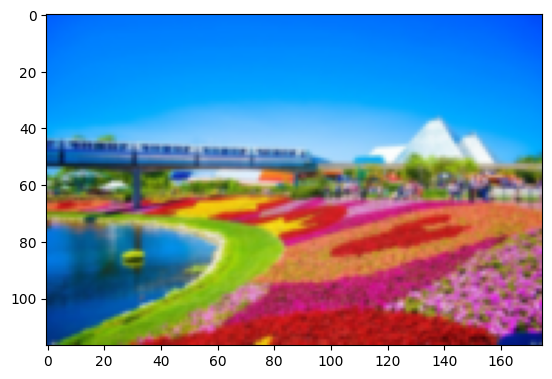

In [ ]:
plt.imshow(image_min)

In [ ]:
width_min = image_min.shape[1]
height_min = image_min.shape[0]
X_min = image_min.reshape([width_min * height_min,3])

b)**DBSCAN**

---



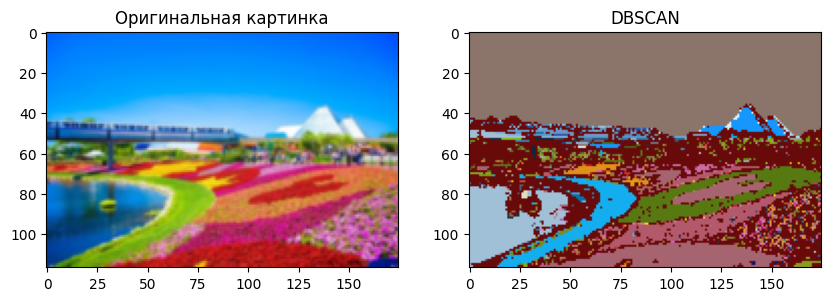

In [ ]:
dbscan = DBSCAN(eps=5, min_samples = 5)
dbscan.fit(X_min)
dbscan_y = dbscan.fit_predict(X_min)
clf = NearestCentroid()
clf.fit(X_min, dbscan_y)
X_dbscan = clf.centroids_[dbscan.fit_predict(X_min)]
X_dbscan = X_dbscan.astype("uint8")
img_dbscan = X_dbscan.reshape([height_min, width_min, 3])
plt.figure(figsize = [10, 10])
plt.subplot(1, 2, 1)
plt.imshow(image_min)
plt.subplot(1, 2, 1).set_title('Оригинальная картинка')
plt.subplot(1, 2, 2)
plt.imshow(img_dbscan)
plt.subplot(1, 2, 2).set_title('DBSCAN')
plt.show()

Оценим работу модели при помощи метрики SSIM:

In [ ]:
score_dbscan, diff = ssim(image_min, img_dbscan, full=True, channel_axis=2)
score_dbscan

0.21265208425075474

c) AgglomerativeClustering. Рассмотрите число кластеров K = 2, 5, 10, 20.

**AgglomerativeClustering число кластеров 2**

---



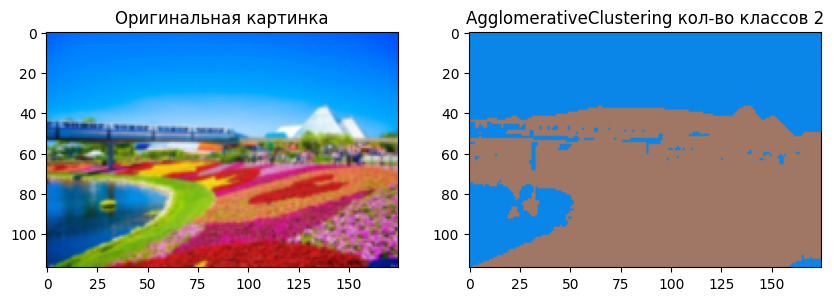

In [ ]:
ac = AgglomerativeClustering(n_clusters=2)
ac.fit(X_min)
y_predict2 = ac.fit_predict(X_min)
clf = NearestCentroid()
clf.fit(X_min, y_predict2)
X_ac2 = clf.centroids_[ac.fit_predict(X_min)]
X_ac2 = X_ac2.astype("uint8")
img_ac_2 = X_ac2.reshape([height_min, width_min, 3])
plt.figure(figsize = [10, 10])
plt.subplot(1, 2, 1)
plt.imshow(image_min)
plt.subplot(1, 2, 1).set_title('Оригинальная картинка')
plt.subplot(1, 2, 2)
plt.imshow(img_ac_2)
plt.subplot(1, 2, 2).set_title('AgglomerativeClustering кол-во классов 2')
plt.show()

Оценим работу модели при помощи метрики SSIM:

In [ ]:
score_ac_2, diff = ssim(image_min, img_ac_2, full=True, channel_axis=2)
score_ac_2

0.3181590266082796

**AgglomerativeClustering число кластеров 5**

---

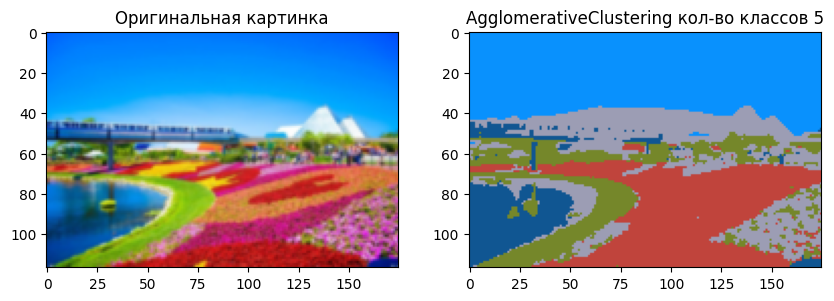

In [ ]:
ac = AgglomerativeClustering(n_clusters=5)
ac.fit(X_min)
y_predict5 = ac.fit_predict(X_min)
clf = NearestCentroid()
clf.fit(X_min, y_predict5)
X_ac5 = clf.centroids_[ac.fit_predict(X_min)]
X_ac5 = X_ac5.astype("uint8")
img_ac_5 = X_ac5.reshape([height_min, width_min, 3])
plt.figure(figsize = [10, 10])
plt.subplot(1, 2, 1)
plt.imshow(image_min)
plt.subplot(1, 2, 1).set_title('Оригинальная картинка')
plt.subplot(1, 2, 2)
plt.imshow(img_ac_5)
plt.subplot(1, 2, 2).set_title('AgglomerativeClustering кол-во классов 5')
plt.show()

Оценим работу модели при помощи метрики SSIM:

In [ ]:
score_ac_5, diff = ssim(image_min, img_ac_5, full=True, channel_axis=2)
score_ac_5

0.49727059050618827

**AgglomerativeClustering число кластеров 10**

---

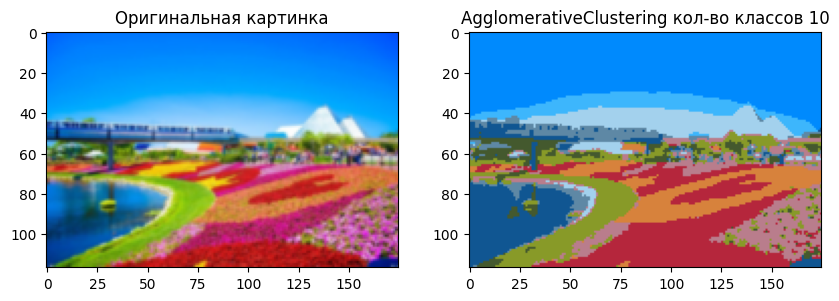

In [ ]:
ac = AgglomerativeClustering(n_clusters=10)
ac.fit(X_min)
y_predict10 = ac.fit_predict(X_min)
clf = NearestCentroid()
clf.fit(X_min, y_predict10)
X_ac10 = clf.centroids_[ac.fit_predict(X_min)]
X_ac10 = X_ac10.astype("uint8")
img_ac_10 = X_ac10.reshape([height_min, width_min, 3])
plt.figure(figsize = [10, 10])
plt.subplot(1, 2, 1)
plt.imshow(image_min)
plt.subplot(1, 2, 1).set_title('Оригинальная картинка')
plt.subplot(1, 2, 2)
plt.imshow(img_ac_10)
plt.subplot(1, 2, 2).set_title('AgglomerativeClustering кол-во классов 10')
plt.show()

Оценим работу модели при помощи метрики SSIM:

In [ ]:
score_ac_10, diff = ssim(image_min, img_ac_10, full=True, channel_axis=2)
score_ac_10

0.6997044737883135

**AgglomerativeClustering число кластеров 20**

---

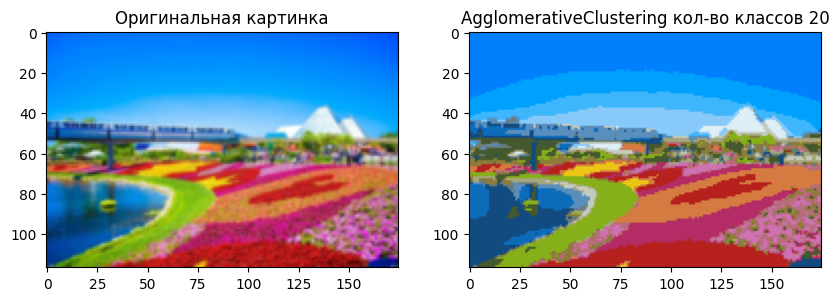

In [ ]:
ac = AgglomerativeClustering(n_clusters=20)
ac.fit(X_min)
y_predict20 = ac.fit_predict(X_min)
clf = NearestCentroid()
clf.fit(X_min, y_predict20)
X_ac20 = clf.centroids_[ac.fit_predict(X_min)]
X_ac20 = X_ac20.astype("uint8")
img_ac_20 = X_ac20.reshape([height_min, width_min, 3])
plt.figure(figsize = [10, 10])
plt.subplot(1, 2, 1)
plt.imshow(image_min)
plt.subplot(1, 2, 1).set_title('Оригинальная картинка')
plt.subplot(1, 2, 2)
plt.imshow(img_ac_20)
plt.subplot(1, 2, 2).set_title('AgglomerativeClustering кол-во классов 20')
plt.show()

Оценим работу модели при помощи метрики SSIM:

In [ ]:
score_ac_20, diff = ssim(image_min, img_ac_20, full=True, channel_axis=2)
score_ac_20

0.7823373982825611

In [ ]:
import pandas as pd

In [ ]:
res = pd.DataFrame({'Модель':['KMeans 2 кластера','KMeans 5 кластеров',
                              'KMeans 10 кластеров','KMeans 20 кластеров','DBSCAN',
                              'AgglomerativeClustering кол-во класстеров 2',
                              'AgglomerativeClustering кол-во класстеров 5',
                              'AgglomerativeClustering кол-во класстеров 10',
                              'AgglomerativeClustering кол-во класстеров 20'],
                    'SSIM метрика':[score_kmeans_2,score_kmeans_5,score_kmeans_10,
                                    score_kmeans_20,score_dbscan,score_ac_2,
                                    score_ac_5,score_ac_10,score_ac_20]})

In [ ]:
res.sort_values('SSIM метрика', ascending= False).reset_index(drop=True)

,Модель,SSIM метрика
0,AgglomerativeClustering кол-во класстеров 20,0.782337
1,KMeans 20 кластеров,0.771126
2,AgglomerativeClustering кол-во класстеров 10,0.699704
3,KMeans 10 кластеров,0.684259
4,KMeans 5 кластеров,0.509221
5,AgglomerativeClustering кол-во класстеров 5,0.497271
6,KMeans 2 кластера,0.364902
7,AgglomerativeClustering кол-во класстеров 2,0.318159
8,DBSCAN,0.212652


**Вывод:**

Лучший результат показала модель KMeans с количеством кластеров 20, ее метрика SSIM составила ~ 0.78.
Также надо отметить, что KMeans потребовалось меньше вычислительных ресурсов в сравнении с агломеративными моделями.
